In [2]:
import numpy as np

from model.Sequential import Sequential
from model.layers.Dense import Dense
from model.layers.Dropout import Dropout
from model.actiators.functional import *
from model.tools.OneHotEncoderTools import OneHotEncoderTools
import random

import matplotlib.pyplot as plt


In [3]:
data = np.genfromtxt("datasets/train_mnist.csv", delimiter=",")
print('reed')


reed


In [4]:
dataset = []
raw_pyhton_dataset = []

for row in data[1:]:
    data_row = [int(row[i])/256 for i in range(1, len(row))]
    data_row.append(int(row[0]))
    
    raw_pyhton_dataset.append(data_row)
print('prepared') 
print(len(raw_pyhton_dataset))

random.shuffle(raw_pyhton_dataset)
raw_pyhton_dataset = raw_pyhton_dataset[:5000]


prepared
42000


In [5]:
for i in range(len(raw_pyhton_dataset)):
    row = raw_pyhton_dataset[i]
    data = OneHotEncoderTools.to_full(row[-1] + 1, 10)    
    dataset_row = [np.array([row[:-1]]),  np.array(data)]
    dataset.append( dataset_row )


train_dataset = dataset[:-len(dataset)//10:1]
test_dataset = dataset[-len(dataset)//10::1]

print(train_dataset[0][1],train_dataset[1][1],train_dataset[2][1],train_dataset[3][1],train_dataset[4][1])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:

model = Sequential('adam', [Dense(100, 'relu', input_shape=784), Dense(10, 'softmax')], ALPHA=0.01)
loss_arr, accuracy_arr = model.fit(train_dataset, need_calculate_loss=False, need_calculate_accuracy=True, num_epochs=20, batch_size=1)
print(model.calc_accuracy(test_dataset))

crossentropy


KeyboardInterrupt: 

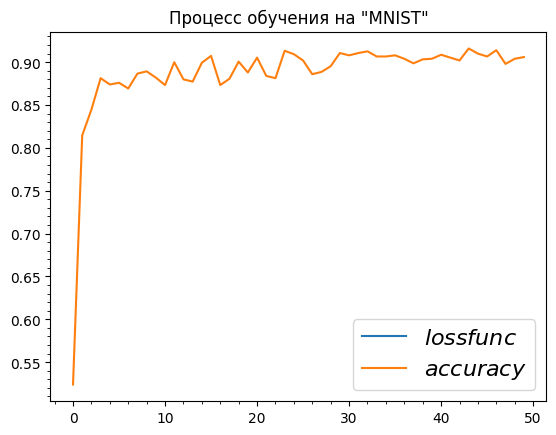

In [10]:

plt.plot(loss_arr, label=r'$loss func$')
plt.plot(accuracy_arr, label=r'$accuracy$')    
plt.legend(fontsize=16)
plt.minorticks_on()
plt.title('Процесс обучения на "MNIST"')

plt.show()

In [12]:

model2 = Sequential('adam', [Dense(100, 'relu', input_shape=784), Dropout(0.8), Dense(10, 'softmax')], ALPHA=0.01)
loss_arr, accuracy_arr = model2.fit(train_dataset, need_calculate_loss=False, need_calculate_accuracy=True, num_epochs=20, batch_size=1)
print(model2.calc_accuracy(test_dataset))

crossentropy


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_arr, label=r'$loss func$')
plt.plot(accuracy_arr, label=r'$accuracy$')    
plt.legend(fontsize=16)
plt.minorticks_on()
plt.title('Процесс обучения на "MNIST"')

plt.show()

In [ ]:
import cv2
import numpy as np
data = cv2.imread('images/3.png', cv2.IMREAD_GRAYSCALE)
data = cv2.bitwise_not(data)
# cv2.imshow('seven', data)
# cv2.waitKey(0) 
# cv2.destroyWindow()


In [ ]:
data = data/256
input_data = [i for j in data for i in j]
print(len(input_data))

In [ ]:
np.argmax(model.predict(np.array([input_data])))